# _K_-means Clustering

In [1]:
%% Machine Learning Online Class
%  Exercise 7 | Principle Component Analysis and K-Means Clustering
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     pca.m
%     projectData.m
%     recoverData.m
%     computeCentroids.m
%     findClosestCentroids.m
%     kMeansInitCentroids.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

In [2]:
%% ================= Part 1: Find Closest Centroids ====================
%  To help you implement K-Means, we have divided the learning algorithm 
%  into two functions -- findClosestCentroids and computeCentroids. In this
%  part, you should complete the code in the findClosestCentroids function. 
%
fprintf('Finding closest centroids.\n\n');

% Load an example dataset that we will be using
load('ex7data2.mat');

% Select an initial set of centroids
K = 3; % 3 Centroids
initial_centroids = [3 3; 6 2; 8 5];

% Find the closest centroids for the examples using the
% initial_centroids
idx = findClosestCentroids(X, initial_centroids);

fprintf('Closest centroids for the first 3 examples: \n')
fprintf(' %d', idx(1:3));
fprintf('\n(the closest centroids should be 1, 3, 2 respectively)\n');

Finding closest centroids.

Closest centroids for the first 3 examples: 
 1 3 2

(the closest centroids should be 1, 3, 2 respectively)
 1 3 2


In [3]:
%% ===================== Part 2: Compute Means =========================
%  After implementing the closest centroids function, you should now
%  complete the computeCentroids function.
%
fprintf('\nComputing centroids means.\n\n');

%  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

fprintf('Centroids computed after initial finding of closest centroids: \n')
fprintf(' %f %f \n' , centroids');
fprintf('\n(the centroids should be\n');
fprintf('   [ 2.428301 3.157924 ]\n');
fprintf('   [ 5.813503 2.633656 ]\n');
fprintf('   [ 7.119387 3.616684 ]\n\n');


Computing centroids means.

Centroids computed after initial finding of closest centroids: 
 2.428301 3.157924 
 5.813503 2.633656 
 7.119387 3.616684 

(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



In [4]:
%% =================== Part 3: K-Means Clustering ======================
%  After you have completed the two functions computeCentroids and
%  findClosestCentroids, you have all the necessary pieces to run the
%  kMeans algorithm. In this part, you will run the K-Means algorithm on
%  the example dataset we have provided. 
%
fprintf('\nRunning K-Means clustering on example dataset.\n\n');

% Load an example dataset
load('ex7data2.mat');

% Settings for running K-Means
K = 3;
max_iters = 10;

% For consistency, here we set centroids to specific values
% but in practice you want to generate them automatically, such as by
% settings them to be random examples (as can be seen in
% kMeansInitCentroids).
initial_centroids = [3 3; 6 2; 8 5];

% Run K-Means algorithm. The 'true' at the end tells our function to plot
% the progress of K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, false);
fprintf('\nK-Means Done.\n\n');


Running K-Means clustering on example dataset.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...

K-Means Done.



In [5]:
%% ============= Part 4: K-Means Clustering on Pixels ===============
%  In this exercise, you will use K-Means to compress an image. To do this,
%  you will first run K-Means on the colors of the pixels in the image and
%  then you will map each pixel onto its closest centroid.
%  
%  You should now complete the code in kMeansInitCentroids.m
%

fprintf('\nRunning K-Means clustering on pixels from an image.\n\n');

%  Load an image of a bird
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

% Size of the image
img_size = size(A);

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

% When using K-Means, it is important the initialize the centroids
% randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, false);


Running K-Means clustering on pixels from an image.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...



Applying K-Means to compress an image.



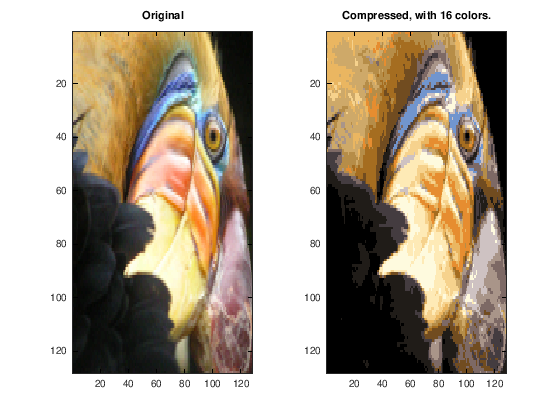

In [6]:
%% ================= Part 5: Image Compression ======================
%  In this part of the exercise, you will use the clusters of K-Means to
%  compress an image. To do this, we first find the closest clusters for
%  each example. After that, we 

fprintf('\nApplying K-Means to compress an image.\n\n');

% Find closest cluster members
idx = findClosestCentroids(X, centroids);

% Essentially, now we have represented the image X as in terms of the
% indices in idx. 

% We can now recover the image from the indices (idx) by mapping each pixel
% (specified by its index in idx) to the centroid value
X_recovered = centroids(idx,:);

% Reshape the recovered image into proper dimensions
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);

% Display the original image 
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));

# Principal Component Analysis

In [7]:
%% Machine Learning Online Class
%  Exercise 7 | Principle Component Analysis and K-Means Clustering
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     pca.m
%     projectData.m
%     recoverData.m
%     computeCentroids.m
%     findClosestCentroids.m
%     kMeansInitCentroids.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

Visualizing example dataset for PCA.


Running PCA on example dataset.

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


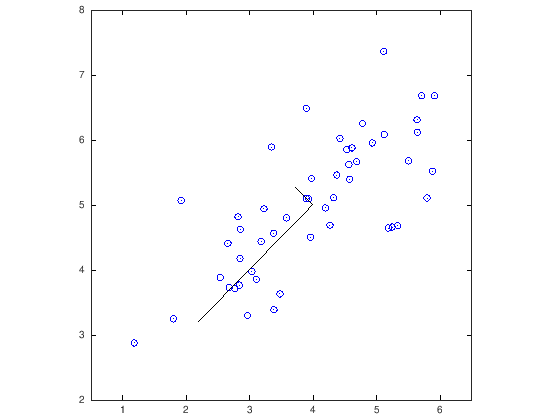

In [8]:
%% ================== Part 1: Load Example Dataset  ===================
%  We start this exercise by using a small dataset that is easily to
%  visualize
%
fprintf('Visualizing example dataset for PCA.\n\n');

%  The following command loads the dataset. You should now have the 
%  variable X in your environment
load ('ex7data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

%% =============== Part 2: Principal Component Analysis ===============
%  You should now implement PCA, a dimension reduction technique. You
%  should complete the code in pca.m
%
fprintf('\nRunning PCA on example dataset.\n\n');

%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Compute mu, the mean of the each feature

%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));
fprintf('\n(you should expect to see -0.707107 -0.707107)\n');


Dimension reduction on example dataset.

Projection of the first example: 1.481274

(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



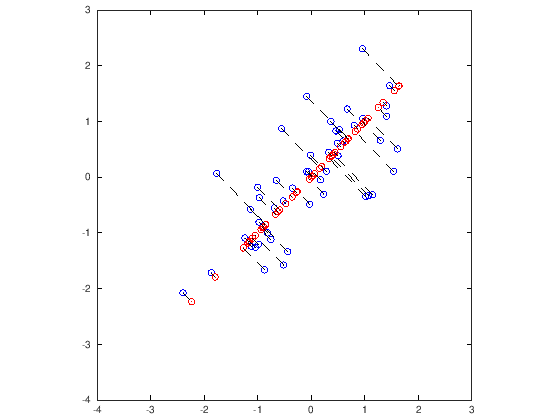

In [9]:
%% =================== Part 3: Dimension Reduction ===================
%  You should now implement the projection step to map the data onto the 
%  first k eigenvectors. The code will then plot the data in this reduced 
%  dimensional space.  This will show you what the data looks like when 
%  using only the corresponding eigenvectors to reconstruct it.
%
%  You should complete the code in projectData.m
%
fprintf('\nDimension reduction on example dataset.\n\n');

%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

%  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));
fprintf('\n(this value should be about 1.481274)\n\n');

X_rec  = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));
fprintf('\n(this value should be about  -1.047419 -1.047419)\n\n');

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off


Loading face dataset.



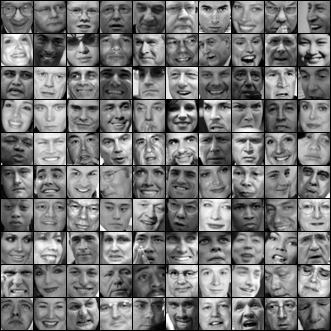

In [10]:
%% =============== Part 4: Loading and Visualizing Face Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  The following code will load the dataset into your environment
%
fprintf('\nLoading face dataset.\n\n');

%  Load Face dataset
load ('ex7faces.mat')

%  Display the first 100 faces in the dataset
displayData(X(1:100, :));


Running PCA on face dataset.
(this might take a minute or two ...)



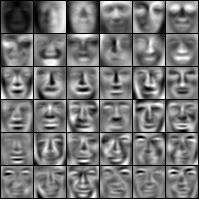

In [11]:
%% =========== Part 5: PCA on Face Data: Eigenfaces  ===================
%  Run PCA and visualize the eigenvectors which are in this case eigenfaces
%  We display the first 36 eigenfaces.
%
fprintf(['\nRunning PCA on face dataset.\n' ...
         '(this might take a minute or two ...)\n\n']);

%  Before running PCA, it is important to first normalize X by subtracting 
%  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Visualize the top 36 eigenvectors found
displayData(U(:, 1:36)');

In [12]:
%% ============= Part 6: Dimension Reduction for Faces =================
%  Project images to the eigen space using the top k eigenvectors 
%  If you are applying a machine learning algorithm 
fprintf('\nDimension reduction for face dataset.\n\n');

K = 100;
Z = projectData(X_norm, U, K);

fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));


Dimension reduction for face dataset.

The projected data Z has a size of: 
5000 100 
The projected data Z has a size of: 5000 100 



Visualizing the projected (reduced dimension) faces.



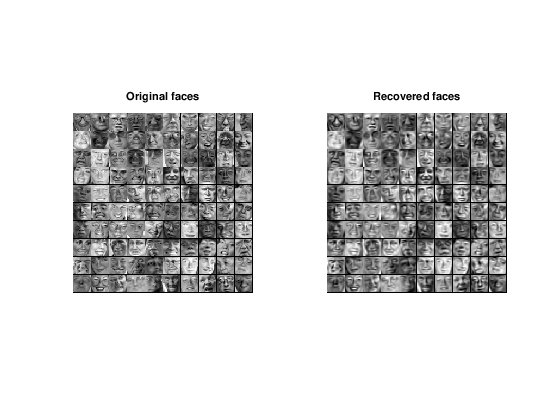

In [13]:
%% ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
%  Project images to the eigen space using the top K eigen vectors and 
%  visualize only using those K dimensions
%  Compare to the original input, which is also displayed

fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);

% Display normalized data
subplot(1, 2, 1);
displayData(X_norm(1:100,:));
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


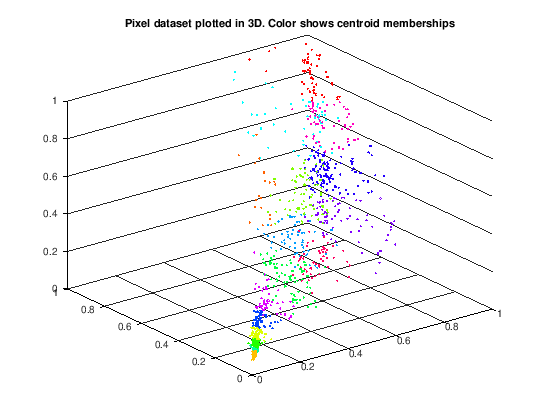

In [14]:
%% === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
%  One useful application of PCA is to use it to visualize high-dimensional
%  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
%  pixel colors of an image. We first visualize this output in 3D, and then
%  apply PCA to obtain a visualization in 2D.

% Reload the image from the previous exercise and run K-Means on it
% For this to work, you need to complete the K-Means assignment first
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

%  Sample 1000 random indexes (since working with all the data is
%  too expensive. If you have a fast computer, you may increase this.
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);

%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 10, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');

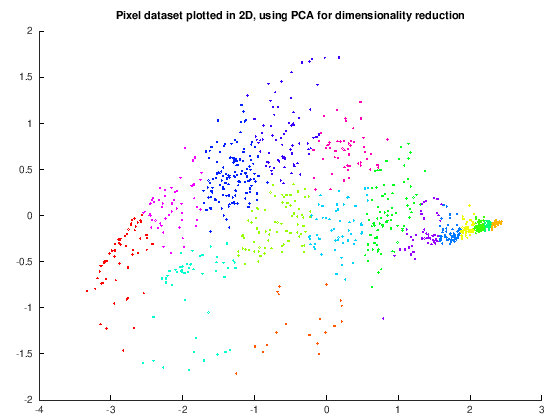

In [15]:
%% === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
% Use PCA to project this cloud to 2D for visualization

% Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

% PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

% Plot in 2D
figure;
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');

# Submission

In [16]:
submit

== Submitting solutions | K-Means Clustering and PCA...
== 
==                                   Part Name |     Score | Feedback
==                                   --------- |     ----- | --------
==            Find Closest Centroids (k-Means) |  30 /  30 | Nice work!
==            Compute Centroid Means (k-Means) |  30 /  30 | Nice work!
==                                         PCA |  20 /  20 | Nice work!
==                          Project Data (PCA) |  10 /  10 | Nice work!
==                          Recover Data (PCA) |  10 /  10 | Nice work!
==                                   --------------------------------
==                                             | 100 / 100 | 
== 
